In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("churn_new.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.0,103.0,1.0,0.0,0.00,1.0,166.6,84.0,45.0,9.62,7.7
1,1.0,74.0,1.0,0.0,0.00,2.0,174.1,96.0,51.0,12.56,8.3
2,0.0,108.0,1.0,1.0,2.65,2.0,276.6,99.0,92.5,11.01,9.8
3,0.0,77.0,1.0,0.0,0.00,5.0,239.2,114.0,54.0,7.50,10.3
4,0.0,142.0,1.0,1.0,2.92,1.0,154.0,75.0,70.2,8.29,10.8


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,100.0,0.1800,0.386123,0.0,0.000,0.000,0.0000,1.00
AccountWeeks,100.0,104.7900,44.649317,19.0,74.750,103.000,127.0000,232.00
ContractRenewal,100.0,0.9300,0.256432,0.0,1.000,1.000,1.0000,1.00
DataPlan,100.0,0.2600,0.440844,0.0,0.000,0.000,1.0000,1.00
DataUsage,100.0,0.7195,1.192261,0.0,0.000,0.000,1.2075,4.59
CustServCalls,100.0,1.5400,1.266667,0.0,1.000,1.000,2.0000,6.00
DayMins,100.0,182.8600,51.412450,70.8,148.475,181.500,218.9000,308.00
DayCalls,100.0,102.8000,21.549098,40.0,88.000,101.500,117.0000,163.00
MonthlyCharge,100.0,56.1950,16.015935,27.0,46.000,53.000,63.0000,104.90
OverageFee,100.0,10.2480,2.736851,3.0,8.270,10.505,12.1300,17.43


In [8]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [9]:
data.duplicated().sum()

0

## Data

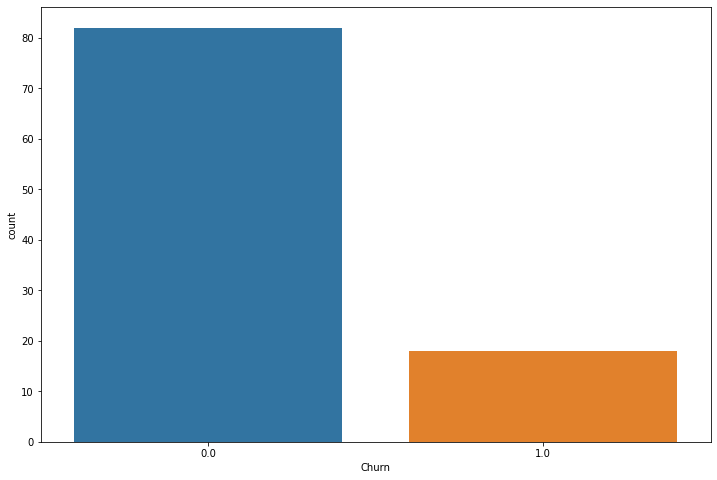

In [10]:
sns.countplot(data.Churn)

In [11]:
data.Churn

0     0.0
1     1.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    1.0
Name: Churn, Length: 100, dtype: float64

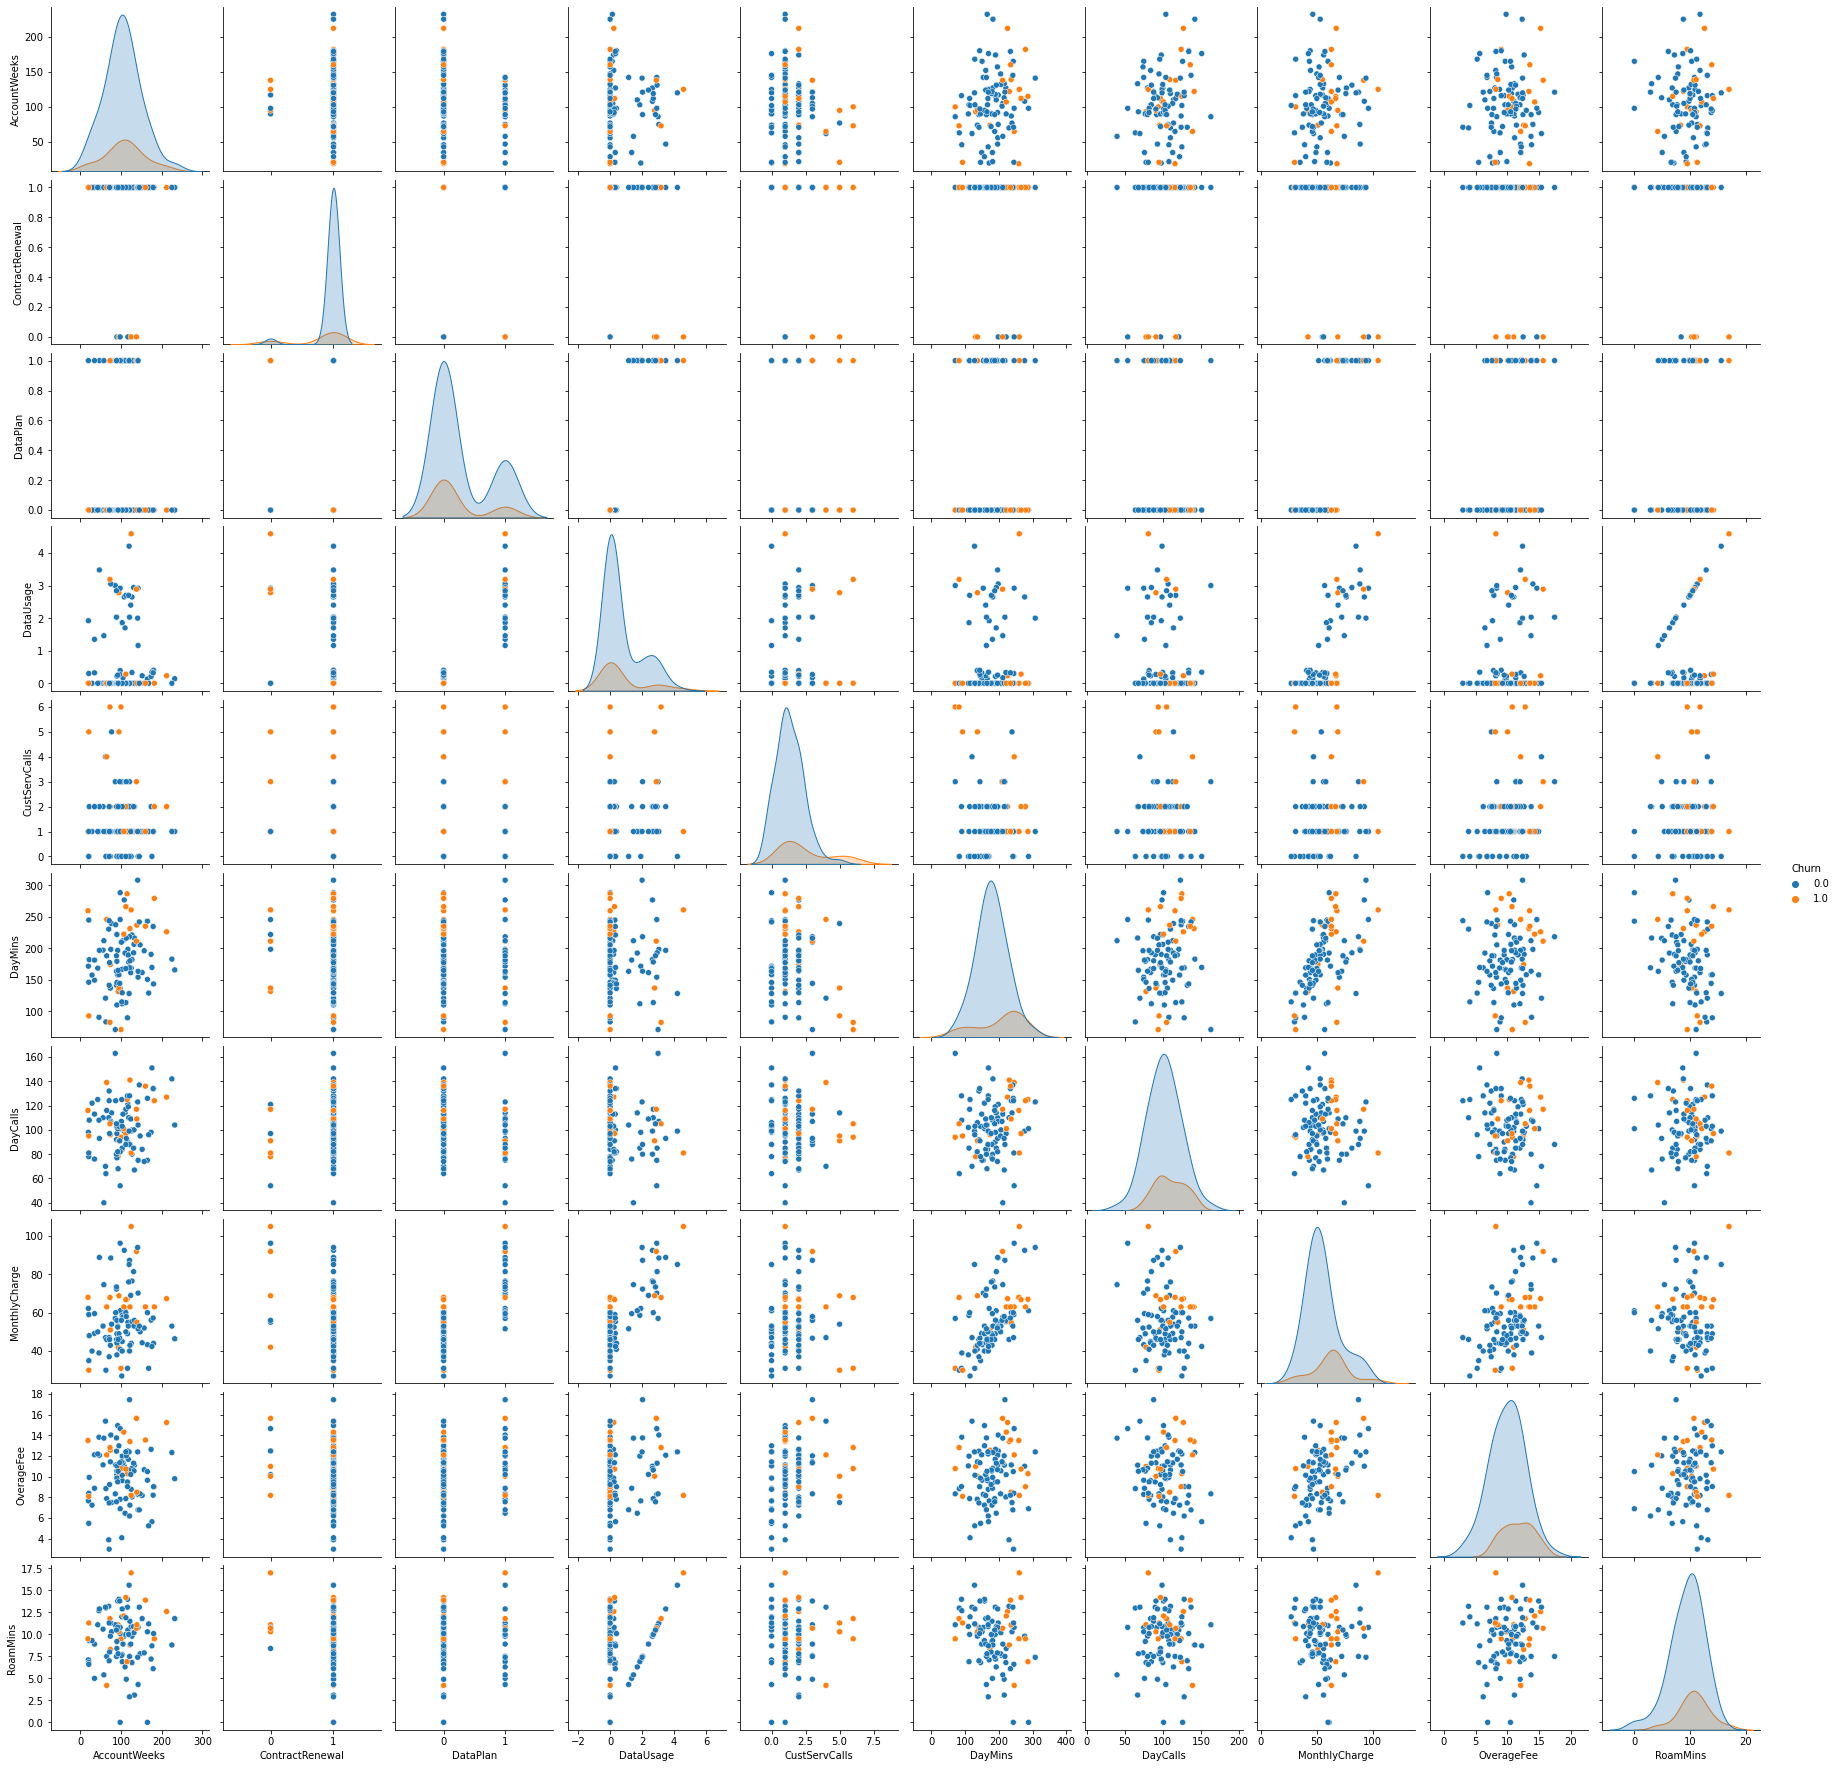

In [12]:
sns.pairplot(data, hue = "Churn", diag_kws={'bw': 0.5})

## Model Import & Preprocessing

In [13]:
import joblib 
#fill na
data = data.fillna(data.median())
#scale, bunu da öncekinden aldık
scaler = joblib.load("scaler.pkl")
#split
X, y = data.drop("Churn", axis=1), data["Churn"] 
X_scaled = scaler.transform(X)

In [14]:
model = joblib.load("xgb_final.pkl")
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.75, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=0.7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              seed=27, subsample=0.6, tree_method='exact',
              validate_parameters=False, verbosity=None)

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, r2_score 

pred = model.predict(X_scaled)

accuracy_xgb = accuracy_score(y, pred)
precision_xgb = precision_score(y, pred)
recall_xgb = recall_score(y, pred)
f1_score_xgb = f1_score(y, pred)
print(f"Accuracy: {accuracy_xgb}")
print(f"Precison: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_score_xgb}")

Accuracy: 0.96
Precison: 0.9375
Recall: 0.8333333333333334
F1 Score: 0.8823529411764706


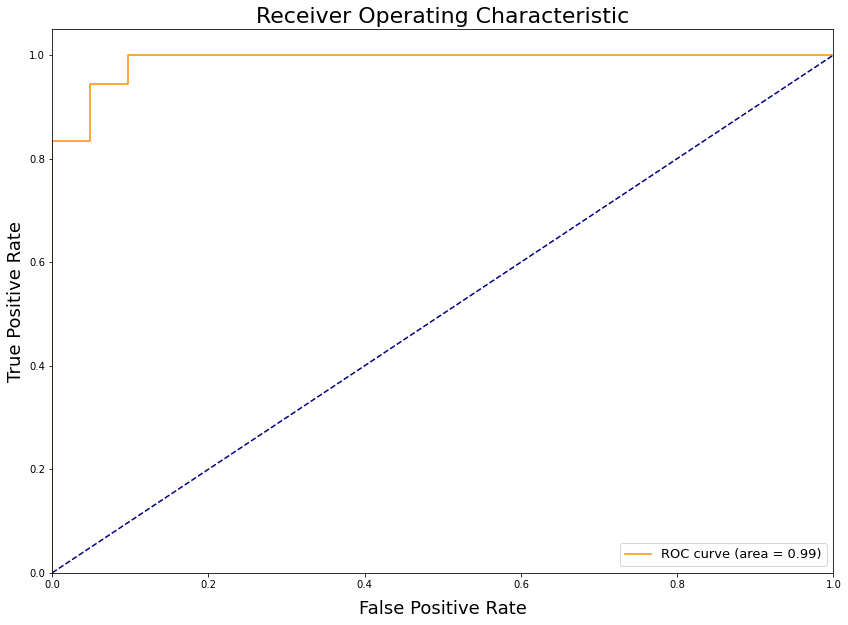

In [16]:
from sklearn.metrics import roc_curve, auc
y_pred_prop = model.predict_proba(X_scaled)[:,1]

fpr_xgb, tpr_xgb, _ = roc_curve(y, y_pred_prop)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(14, 10))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

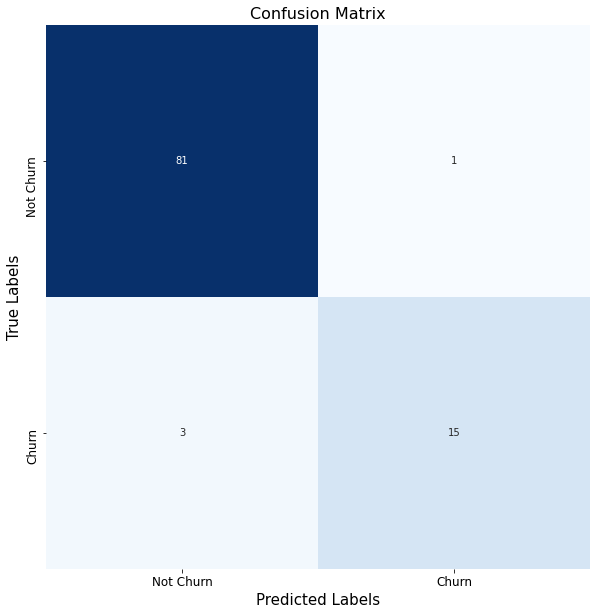

In [17]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(14, 10))

cm = confusion_matrix(y, pred)

ax = sns.heatmap(cm, square=True, annot=True, cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix',fontsize = 16)
ax.xaxis.set_ticklabels(['Not Churn', 'Churn'],fontsize = 12)
ax.yaxis.set_ticklabels(['Not Churn', 'Churn'],fontsize = 12)
plt.show()

In [18]:
import plotly.express as px

fi_dt = pd.DataFrame({'Feature':X.columns,
       'Importance':model.feature_importances_}).sort_values(by = "Importance",ascending = True).reset_index(drop = True)
       
fig = px.bar(fi_dt, x='Importance', y='Feature',orientation='h',color='Importance')
fig.show()

Unsupported

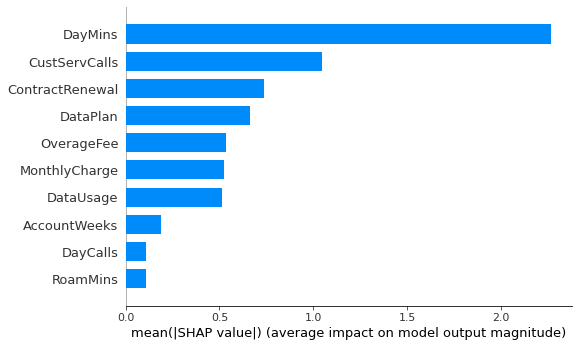

In [19]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

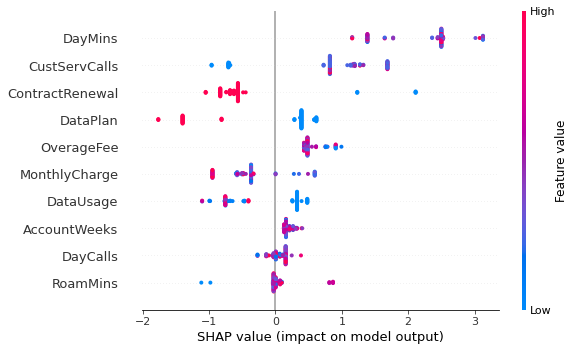

In [20]:
f = plt.figure()
shap.summary_plot(shap_values, X)

X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_output = X_new.copy()

shap.initjs()

def shap_plot(num, j=0, X_output = X_output):
    """
    num: index
    j: element index of shap values (0 for 1 row)
    """
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(np.expand_dims(X_output.loc[num, :], axis=0))
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], X_output.loc[num,:])
    return(p)

shap_plot(18)

In [22]:
model.predict(np.expand_dims(X_output.loc[99, :], axis=0))

array([1.])

In [23]:
shap.initjs()
shap_plot(4)

Visualization omitted, Javascript library not loaded! 
 Have you run `initjs()` in this notebook? If this notebook was from another
 user you must also trust this notebook (File -> Trust notebook). If you are viewing
 this notebook on github the Javascript has been stripped for security. If you are using
 JupyterLab this error is because a JupyterLab extension has not yet been written.

In [24]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_output = X_new.copy()
print(model.predict(np.expand_dims(X_output.loc[10, :], axis=0)))

[0.]


In [27]:
import pandas as pd
import plotly.express as px

import joblib

data = data.fillna(data.median())
scaler = joblib.load("scaler.pkl")

X, y = data.drop("Churn", axis=1), data["Churn"]
X_scaled = scaler.transform(X)

model = joblib.load("xgb_final.pkl")

fi_dt = pd.DataFrame({'Feature': X.columns,
                      'Importance': model.feature_importances_}).sort_values(by="Importance",
                                                                             ascending=True).reset_index(drop=True)

fig = px.bar(fi_dt, x='Importance', y='Feature', orientation='h', color='Importance')
fig.show()

Unsupported